In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.DataFrame([10, 20, 30, 40], columns=['numbers'],
                  index=['a', 'b', 'c', 'd'])
df

,numbers
a,10
b,20
c,30
d,40


In [3]:
df.index  # the index values

Index(['a', 'b', 'c', 'd'], dtype='object')

In [4]:
df.columns  # the column names

Index(['numbers'], dtype='object')

In [5]:
df.loc['c']  # selection via index

numbers    30
Name: c, dtype: int64

In [6]:
df.loc[['a', 'd']]  # selection of multiple indices

,numbers
a,10
d,40


In [7]:
df.loc[df.index[1:3]]  # selection via Index object

,numbers
b,20
c,30


In [8]:
df['numbers']

a    10
b    20
c    30
d    40
Name: numbers, dtype: int64

In [9]:
df.sum()  # sum per column

numbers    100
dtype: int64

In [10]:
df.apply(lambda x: x ** 2)  # square of every element

,numbers
a,100
b,400
c,900
d,1600


In [11]:
df ** 2  # again square, this time NumPy-like

,numbers
a,100
b,400
c,900
d,1600


In [12]:
df['floats'] = (1.5, 2.5, 3.5, 4.5)
  # new column is generated
df

,numbers,floats
a,10,1.5
b,20,2.5
c,30,3.5
d,40,4.5


In [13]:
df['floats']  # selection of column

a    1.5
b    2.5
c    3.5
d    4.5
Name: floats, dtype: float64

In [15]:
df['names'] = pd.DataFrame(['Yves', 'Guido', 'Felix', 'Francesc'],
                           index=['d', 'a', 'b', 'c'])
df

,numbers,floats,names
a,10,1.5,Guido
b,20,2.5,Felix
c,30,3.5,Francesc
d,40,4.5,Yves


In [16]:
df.append({'numbers': 100, 'floats': 5.75, 'names': 'Henry'},
               ignore_index=True)

,numbers,floats,names
0,10,1.50,Guido
1,20,2.50,Felix
2,30,3.50,Francesc
3,40,4.50,Yves
4,100,5.75,Henry


In [17]:
df = df.append(pd.DataFrame({'numbers': 100, 'floats': 5.75,
                             'names': 'Henry'}, index=['z',]))
df

,floats,names,numbers
a,1.50,Guido,10
b,2.50,Felix,20
c,3.50,Francesc,30
d,4.50,Yves,40
z,5.75,Henry,100


In [18]:
df.join(pd.DataFrame([1, 4, 9, 16, 25],
            index=['a', 'b', 'c', 'd', 'y'],
            columns=['squares',]))

,floats,names,numbers,squares
a,1.50,Guido,10,1.0
b,2.50,Felix,20,4.0
c,3.50,Francesc,30,9.0
d,4.50,Yves,40,16.0
z,5.75,Henry,100,NaN


In [19]:
df = df.join(pd.DataFrame([1, 4, 9, 16, 25],
                    index=['a', 'b', 'c', 'd', 'y'],
                    columns=['squares',]),
                    how='outer')
df

,floats,names,numbers,squares
a,1.50,Guido,10.0,1.0
b,2.50,Felix,20.0,4.0
c,3.50,Francesc,30.0,9.0
d,4.50,Yves,40.0,16.0
y,NaN,NaN,NaN,25.0
z,5.75,Henry,100.0,NaN


In [20]:
df[['numbers', 'squares']].mean()
  # column-wise mean

numbers    40.0
squares    11.0
dtype: float64

In [21]:
df[['numbers', 'squares']].std()

numbers    35.355339
squares     9.669540
dtype: float64

In [22]:
a = np.random.standard_normal((9, 4))
a.round(6)

array([[-1.65771 , -0.534492,  1.578659, -0.221389],
       [-0.600622, -0.888089,  0.426669,  0.404796],
       [ 0.810959, -0.063723, -0.008511,  1.375728],
       [ 1.017361,  0.365658, -0.541914, -1.26897 ],
       [ 0.64889 , -0.928266, -2.594091,  0.620352],
       [-1.448124,  1.380629, -0.592017, -0.410625],
       [ 1.235595,  1.036976,  0.104704, -0.135921],
       [ 0.419398, -1.337521,  1.112479,  0.541903],
       [ 0.410908, -0.081081,  1.164919,  1.524707]])

In [23]:
df = pd.DataFrame(a)
df

,0,1,2,3
0,-1.657710,-0.534492,1.578659,-0.221389
1,-0.600622,-0.888089,0.426669,0.404796
2,0.810959,-0.063723,-0.008511,1.375728
3,1.017361,0.365658,-0.541914,-1.268970
4,0.648890,-0.928266,-2.594091,0.620352
5,-1.448124,1.380629,-0.592017,-0.410625
6,1.235595,1.036976,0.104704,-0.135921
7,0.419398,-1.337521,1.112479,0.541903
8,0.410908,-0.081081,1.164919,1.524707


In [24]:
df.columns = ['No1', 'No2', 'No3', 'No4']
df

,No1,No2,No3,No4
0,-1.657710,-0.534492,1.578659,-0.221389
1,-0.600622,-0.888089,0.426669,0.404796
2,0.810959,-0.063723,-0.008511,1.375728
3,1.017361,0.365658,-0.541914,-1.268970
4,0.648890,-0.928266,-2.594091,0.620352
5,-1.448124,1.380629,-0.592017,-0.410625
6,1.235595,1.036976,0.104704,-0.135921
7,0.419398,-1.337521,1.112479,0.541903
8,0.410908,-0.081081,1.164919,1.524707


In [25]:
df['No2'].iloc[3]  # value in column No2 at index position 3

0.3656578910490253

In [26]:
dates = pd.date_range('2015-1-1', periods=9, freq='M')
dates

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30'],
              dtype='datetime64[ns]', freq='M')

In [27]:
df.index = dates
df

,No1,No2,No3,No4
2015-01-31,-1.657710,-0.534492,1.578659,-0.221389
2015-02-28,-0.600622,-0.888089,0.426669,0.404796
2015-03-31,0.810959,-0.063723,-0.008511,1.375728
2015-04-30,1.017361,0.365658,-0.541914,-1.268970
2015-05-31,0.648890,-0.928266,-2.594091,0.620352
2015-06-30,-1.448124,1.380629,-0.592017,-0.410625
2015-07-31,1.235595,1.036976,0.104704,-0.135921
2015-08-31,0.419398,-1.337521,1.112479,0.541903
2015-09-30,0.410908,-0.081081,1.164919,1.524707


In [28]:
df.sum()

No1    0.836656
No2   -1.049910
No3    0.650898
No4    2.430579
dtype: float64

In [29]:
df.mean()

No1    0.092962
No2   -0.116657
No3    0.072322
No4    0.270064
dtype: float64

In [30]:
df.cumsum()

,No1,No2,No3,No4
2015-01-31,-1.657710,-0.534492,1.578659,-0.221389
2015-02-28,-2.258331,-1.422581,2.005328,0.183407
2015-03-31,-1.447372,-1.486304,1.996817,1.559135
2015-04-30,-0.430012,-1.120646,1.454903,0.290165
2015-05-31,0.218878,-2.048912,-1.139188,0.910517
2015-06-30,-1.229246,-0.668283,-1.731205,0.499891
2015-07-31,0.006349,0.368693,-1.626500,0.363970
2015-08-31,0.425747,-0.968828,-0.514022,0.905873
2015-09-30,0.836656,-1.049910,0.650898,2.430579


In [31]:
df.describe()

,No1,No2,No3,No4
count,9.000000,9.000000,9.000000,9.000000
mean,0.092962,-0.116657,0.072322,0.270064
std,1.067310,0.917084,1.255303,0.883861
min,-1.657710,-1.337521,-2.594091,-1.268970
25%,-0.600622,-0.888089,-0.541914,-0.221389
50%,0.419398,-0.081081,0.104704,0.404796
75%,0.810959,0.365658,1.112479,0.620352
max,1.235595,1.380629,1.578659,1.524707


In [32]:
np.sqrt(abs(df))

,No1,No2,No3,No4
2015-01-31,1.287521,0.731090,1.256447,0.470519
2015-02-28,0.774998,0.942385,0.653199,0.636236
2015-03-31,0.900533,0.252434,0.092258,1.172914
2015-04-30,1.008643,0.604697,0.736148,1.126486
2015-05-31,0.805537,0.963466,1.610618,0.787624
2015-06-30,1.203380,1.175002,0.769426,0.640801
2015-07-31,1.111573,1.018320,0.323580,0.368675
2015-08-31,0.647609,1.156512,1.054741,0.736141
2015-09-30,0.641021,0.284748,1.079314,1.234790


In [33]:
np.sqrt(abs(df)).sum()

No1    8.380816
No2    7.128652
No3    7.575732
No4    7.174186
dtype: float64

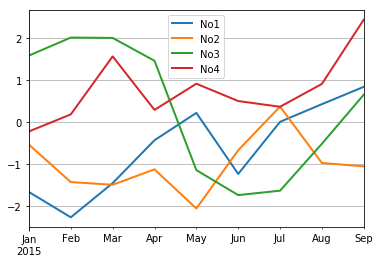

In [34]:
%matplotlib inline
df.cumsum().plot(lw=2.0, grid=True)

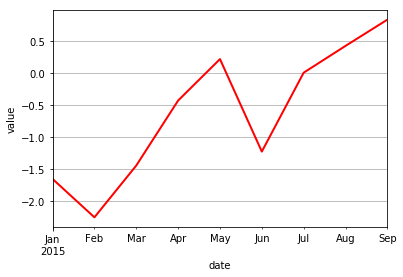

In [35]:
import matplotlib.pyplot as plt
df['No1'].cumsum().plot(style='r', lw=2., grid=True)
plt.xlabel('date')
plt.ylabel('value')

In [36]:
df['Quarter'] = ['Q1', 'Q1', 'Q1', 'Q2', 'Q2', 'Q2', 'Q3', 'Q3', 'Q3']
df

,No1,No2,No3,No4,Quarter
2015-01-31,-1.657710,-0.534492,1.578659,-0.221389,Q1
2015-02-28,-0.600622,-0.888089,0.426669,0.404796,Q1
2015-03-31,0.810959,-0.063723,-0.008511,1.375728,Q1
2015-04-30,1.017361,0.365658,-0.541914,-1.268970,Q2
2015-05-31,0.648890,-0.928266,-2.594091,0.620352,Q2
2015-06-30,-1.448124,1.380629,-0.592017,-0.410625,Q2
2015-07-31,1.235595,1.036976,0.104704,-0.135921,Q3
2015-08-31,0.419398,-1.337521,1.112479,0.541903,Q3
2015-09-30,0.410908,-0.081081,1.164919,1.524707,Q3


In [37]:
groups = df.groupby('Quarter')

In [38]:
groups.mean()

,No1,No2,No3,No4
Quarter,,,,
Q1,-0.482457,-0.495435,0.665606,0.519712
Q2,0.072709,0.272674,-1.242674,-0.353081
Q3,0.688634,-0.127209,0.794034,0.643563


In [39]:
groups.size()

Quarter
Q1    3
Q2    3
Q3    3
dtype: int64

In [40]:
df['Odd_Even'] = ['Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even',
                  'Odd', 'Even', 'Odd']

In [41]:
groups = df.groupby(['Quarter', 'Odd_Even'])

In [42]:
groups.size()

Quarter  Odd_Even
Q1       Even        1
         Odd         2
Q2       Even        2
         Odd         1
Q3       Even        1
         Odd         2
dtype: int64

In [43]:
groups.mean()

No1       No2       No3       No4
Quarter Odd_Even                                        
Q1      Even     -0.600622 -0.888089  0.426669  0.404796
        Odd      -0.423375 -0.299107  0.785074  0.577170
Q2      Even     -0.215382  0.873143 -0.566965 -0.839798
        Odd       0.648890 -0.928266 -2.594091  0.620352
Q3      Even      0.419398 -1.337521  1.112479  0.541903
        Odd       0.823252  0.477947  0.634812  0.694393

In [44]:
raw = pd.read_csv('tr_eikon_eod_data.csv',
                 index_col=0, parse_dates=True)
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1972 entries, 2010-01-04 to 2017-10-31
Data columns (total 12 columns):
AAPL.O    1972 non-null float64
MSFT.O    1972 non-null float64
INTC.O    1972 non-null float64
AMZN.O    1972 non-null float64
GS.N      1972 non-null float64
SPY       1972 non-null float64
.SPX      1972 non-null float64
.VIX      1972 non-null float64
EUR=      1972 non-null float64
XAU=      1972 non-null float64
GDX       1972 non-null float64
GLD       1972 non-null float64
dtypes: float64(12)
memory usage: 200.3 KB


In [46]:
data = pd.DataFrame(raw['.SPX'])
data.columns = ['Close']

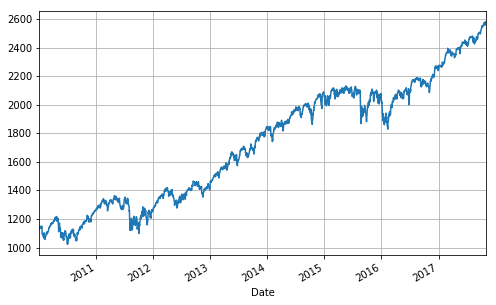

In [49]:
data['Close'].plot(figsize=(8, 5), grid=True)

In [50]:
%time data['Return'] = np.log(data['Close'] / data['Close'].shift(1))

Wall time: 40.6 ms


In [53]:
data[['Close', 'Return']].tail()

,Close,Return
Date,,
2017-10-25,2557.15,-0.004674
2017-10-26,2560.40,0.001270
2017-10-27,2581.07,0.008041
2017-10-30,2572.83,-0.003198
2017-10-31,2575.26,0.000944


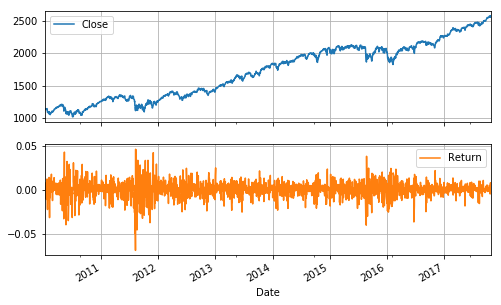

In [57]:
data[['Close', 'Return']].plot( subplots=True,
                              figsize=(8, 5), grid=True);

In [58]:
data['42d'] = data['Close'].rolling(window=42).mean()
data['252d'] = data['Close'].rolling(window=252).mean()

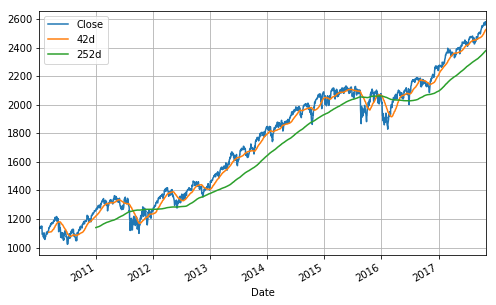

In [60]:
data[['Close', '42d', '252d']].plot(figsize=(8, 5), grid=True)

In [61]:
import math
data['Mov_Vol'] = data['Return'].rolling(window=252).std() * math.sqrt(252)

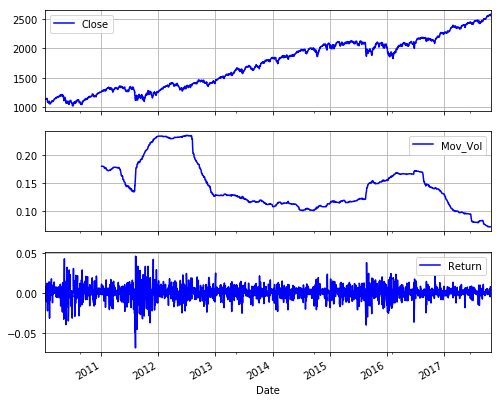

In [62]:
data[['Close', 'Mov_Vol', 'Return']].plot(subplots=True, style='b',
                                         figsize=(8, 7), grid=True);

In [63]:
import pandas as pd

In [64]:
raw = pd.read_csv('tr_eikon_eod_data.csv',
                 index_col=0, parse_dates=True)
spx = pd.DataFrame(raw['.SPX'])

In [66]:
np.round(spx.tail())

,.SPX
Date,
2017-10-25,2557.0
2017-10-26,2560.0
2017-10-27,2581.0
2017-10-30,2573.0
2017-10-31,2575.0


In [67]:
vix = pd.DataFrame(raw['.VIX'])
vix.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1972 entries, 2010-01-04 to 2017-10-31
Data columns (total 1 columns):
.VIX    1972 non-null float64
dtypes: float64(1)
memory usage: 30.8 KB


In [68]:
data = spx.join(vix)

In [69]:
data.tail()

,.SPX,.VIX
Date,,
2017-10-25,2557.15,11.23
2017-10-26,2560.40,11.30
2017-10-27,2581.07,9.80
2017-10-30,2572.83,10.50
2017-10-31,2575.26,10.18


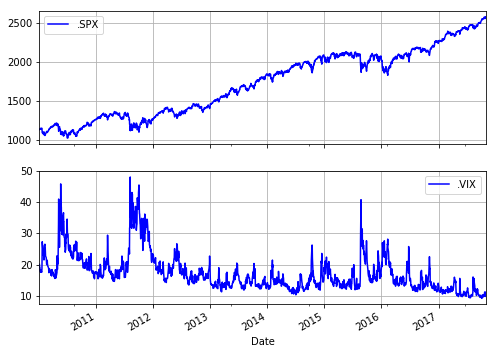

In [70]:
data.plot(subplots=True, grid=True, style='b', figsize=(8, 6));

In [71]:
rets = np.log(data / data.shift(1)) 
rets.head()

,.SPX,.VIX
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.003111,-0.035038
2010-01-06,0.000545,-0.009868
2010-01-07,0.003993,-0.005233
2010-01-08,0.002878,-0.050024


In [72]:
rets.dropna(inplace=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x06110430>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0BF2CB30>], dtype=object)

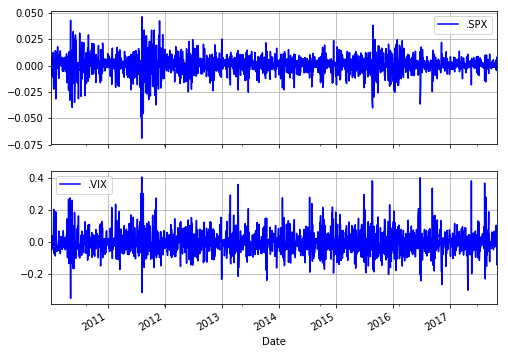

In [73]:
rets.plot(subplots=True, grid=True, style='b', figsize=(8, 6))

In [74]:
xdat = rets['.SPX'].values
ydat = rets['.VIX'].values
reg = np.polyfit(x=xdat, y=ydat, deg=1)
reg

array([ -6.45336250e+00,   2.34474296e-03])

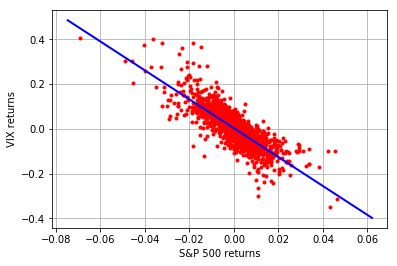

In [75]:
plt.plot(xdat, ydat, 'r.')
ax = plt.axis()  # grab axis values
x = np.linspace(ax[0], ax[1] + 0.01)
plt.plot(x, np.polyval(reg, x), 'b', lw=2)
plt.grid(True)
plt.axis('tight')
plt.xlabel('S&P 500 returns')
plt.ylabel('VIX returns')

In [78]:
rets.corr()

,.SPX,.VIX
.SPX,1.000000,-0.808372
.VIX,-0.808372,1.000000


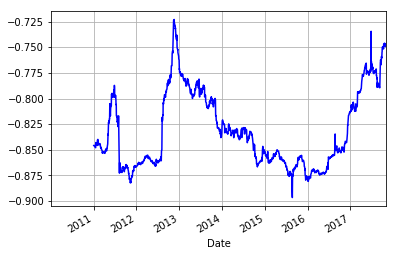

In [79]:
rets['.SPX'].rolling(window=252).corr(rets['.VIX']).plot(grid=True, style='b')

In [80]:
eur_usd = pd.read_csv('fxcm_eur_usd_tick_data.csv',
                     index_col=0, parse_dates=True)

In [81]:
eur_usd['Mid'] = eur_usd.mean(axis=1)

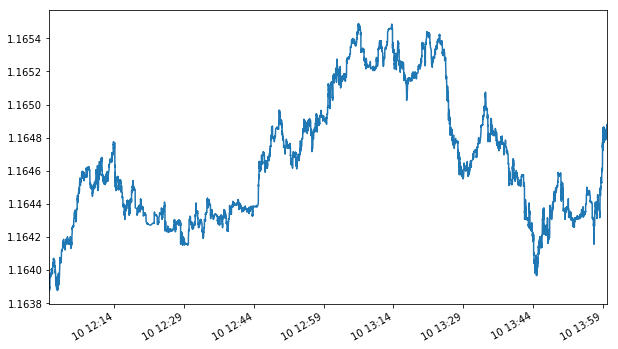

In [82]:
eur_usd['Mid'].plot(figsize=(10, 6));

In [84]:
eur_usd_resam = eur_usd.resample(rule='1min', label='last').last()
eur_usd_resam.head()

,Bid,Ask,Mid
2017-11-10 12:00:00,1.16406,1.16407,1.164065
2017-11-10 12:01:00,1.16396,1.16397,1.163965
2017-11-10 12:02:00,1.16416,1.16418,1.164170
2017-11-10 12:03:00,1.16417,1.16417,1.164170
2017-11-10 12:04:00,1.16425,1.16427,1.164260


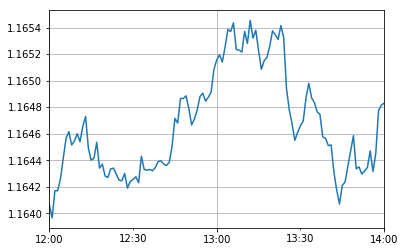

In [86]:
eur_usd_resam['Mid'].plot(grid=True)

In [87]:
def reversal(x):
    return 2 * 1.16 - x

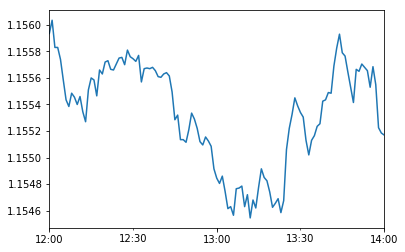

In [88]:
eur_usd_resam['Mid'].apply(reversal).plot()